In [47]:
import networkx as nx
import collections
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter

In [5]:
G = nx.Graph() 

In [6]:
infile = open("sampleusergraph.txt", "r+")

for line in infile:
    stuff = line.rstrip().split(",")
    G.add_edge(stuff[0], stuff[1])

In [13]:
degree_list = list(zip(*list(G.degree())))[1]
counter = collections.Counter(degree_list)
print(counter)

Counter({1: 794, 2: 133, 3: 28, 4: 11, 5: 7, 6: 4, 9: 4, 7: 3, 11: 3, 12: 2, 13: 2, 16: 2, 8: 1, 10: 1, 45: 1, 17: 1, 19: 1, 25: 1, 28: 1, 69: 1, 31: 1, 35: 1, 39: 1, 109: 1})


In [15]:
counter[1]

794

In [31]:
least = min(counter.keys())
most = max(counter.keys())

In [32]:
x_axis = [i for i in range(least, most + 1)]
y_axis = []

for x in x_axis:
    if counter[x]:
        y_axis.append(counter[x] + 1)
    else:
        y_axis.append(1)

In [33]:
x_axis = np.asarray(x_axis)
y_axis = np.asarray(y_axis)

In [34]:
x_axis = np.log(x_axis)
y_axis = np.log(y_axis)

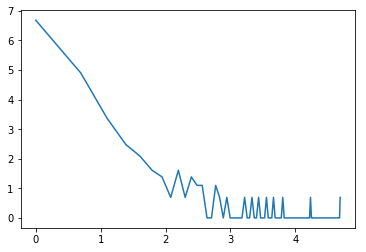

In [35]:
plt.plot(x_axis, y_axis)
plt.show()

In [37]:
pr = nx.pagerank(G)

In [40]:
pagerank = list(pr.items())

In [41]:
pagerank = sorted(pagerank, key=lambda x: x[1], reverse=True)

In [42]:
pagerank

[('127920', 0.04953078085544176),
 ('15742', 0.031207603913202254),
 ('191093', 0.020180416233620997),
 ('19946', 0.016162968292867272),
 ('53271', 0.016043504636499693),
 ('699721', 0.012884272326967133),
 ('56024', 0.012769286539200089),
 ('4544191', 0.011150349755901614),
 ('245969', 0.008655910559835266),
 ('36737', 0.007958754571416558),
 ('1334398', 0.0077733692177267685),
 ('2845649', 0.007278028437319901),
 ('585187', 0.0062928955163875895),
 ('1678936', 0.006016379445106097),
 ('14037', 0.005722576138384047),
 ('6175708', 0.00555989266606208),
 ('114605', 0.005438884124550249),
 ('63108', 0.005104589139508286),
 ('29116', 0.004770346738927588),
 ('393583', 0.004646919107974039),
 ('159435', 0.004581410943967975),
 ('127119', 0.004518759298182212),
 ('418787', 0.004318269086649673),
 ('943050', 0.004097000111315669),
 ('174442', 0.0035686844619868116),
 ('2593018', 0.003402268042572666),
 ('345103', 0.003130845629366799),
 ('131657', 0.003087808618494745),
 ('17665', 0.00300539

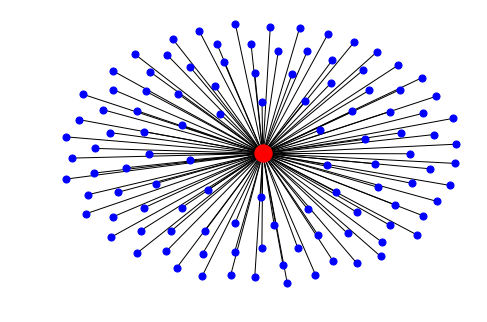

In [49]:
node_and_degree = G.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
# Create ego graph of main hub
hub_ego = nx.ego_graph(G, largest_hub)
# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False)
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=300, node_color='r')
plt.show()